In [1]:
import tensorflow as tf
from keras.applications import VGG16

##### Loading pre-trained VGG16 model without including the top three fully connected layers

In [2]:
base_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(64,64,3)
)

In [3]:
base_model.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [4]:
x = base_model.output # Output of VGG16 is tensor(4-D Tensor) of shape (None, 2, 2, 512). This shape depends on the shape of input image and filters used.
x

<KerasTensor: shape=(None, 2, 2, 512) dtype=float32 (created by layer 'block5_pool')>

In [5]:
base_model.input

<KerasTensor: shape=(None, 64, 64, 3) dtype=float32 (created by layer 'input_1')>

In [6]:
# Flatten the output of base model
x = tf.keras.layers.Flatten()(x)
fc1 = tf.keras.layers.Dense(units=256, activation='relu')(x)
fc2 = tf.keras.layers.Dense(units=256, activation='relu')(fc1)
fc3 = tf.keras.layers.Dense(units=256, activation='relu')(fc2)
fc4 = tf.keras.layers.Dense(units=256, activation='relu')(fc3)

In [7]:
output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(fc4)

In [8]:
model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

In [9]:
base_model.trainable = False


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
# Data Augmentation - Data augmentation is a set of techniques to artificially increase the amount 
# of data by generating new data points from existing data
train_datagen = ImageDataGenerator(
    rescale=1./255,     #feature scaling--->putting all values between 0 and 1
    shear_range=0.2,    #Shear angle in the counter-clockwise direction in degrees
    zoom_range=0.2,
    horizontal_flip=True    #Radomly flip inputs horizontally
)    

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_set = train_datagen.flow_from_directory('C:/Users/User/MachineLearning/TransferLearning/training_set', target_size=(64,64), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('C:/Users/User/MachineLearning/TransferLearning/test_set', target_size=(64,64), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
history = model.fit(train_set, epochs=20, validation_data=test_set)

Epoch 1/20
250/250 [==============================] - 167s 665ms/step - loss: 0.5173 - accuracy: 0.7448 - val_loss: 0.4518 - val_accuracy: 0.7835
Epoch 2/20
250/250 [==============================] - 163s 651ms/step - loss: 0.4546 - accuracy: 0.7836 - val_loss: 0.4564 - val_accuracy: 0.7760
Epoch 3/20
250/250 [==============================] - 191s 764ms/step - loss: 0.4390 - accuracy: 0.7929 - val_loss: 0.4231 - val_accuracy: 0.8055
Epoch 4/20
250/250 [==============================] - 171s 685ms/step - loss: 0.4216 - accuracy: 0.8073 - val_loss: 0.4280 - val_accuracy: 0.8045
Epoch 5/20
250/250 [==============================] - 172s 687ms/step - loss: 0.4183 - accuracy: 0.8014 - val_loss: 0.4112 - val_accuracy: 0.8075
Epoch 6/20
250/250 [==============================] - 175s 698ms/step - loss: 0.4098 - accuracy: 0.8102 - val_loss: 0.4092 - val_accuracy: 0.8070
Epoch 7/20
250/250 [==============================] - 174s 696ms/step - loss: 0.3973 - accuracy: 0.8170 - val_loss: 0.4189 -

In [17]:
model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 64, 64, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'block1_conv1',
    'trainable': False,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'block1_conv1',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Conv2D',
   

In [18]:
history.history

{'loss': [0.5172984004020691,
  0.45463234186172485,
  0.43901288509368896,
  0.42163705825805664,
  0.41827380657196045,
  0.40981951355934143,
  0.39732348918914795,
  0.38187840580940247,
  0.3825344145298004,
  0.37077081203460693,
  0.3687683343887329,
  0.3477652668952942,
  0.33871355652809143,
  0.3298351764678955,
  0.32053008675575256,
  0.31935998797416687,
  0.3081376552581787,
  0.3005611300468445,
  0.2915997803211212,
  0.2830255329608917],
 'accuracy': [0.7447500228881836,
  0.7836250066757202,
  0.7928749918937683,
  0.8072500228881836,
  0.8013749718666077,
  0.8102499842643738,
  0.8169999718666077,
  0.8224999904632568,
  0.8266249895095825,
  0.8318750262260437,
  0.8321250081062317,
  0.8413749933242798,
  0.8447499871253967,
  0.8508750200271606,
  0.859749972820282,
  0.8608750104904175,
  0.8583750128746033,
  0.8665000200271606,
  0.8761249780654907,
  0.8743749856948853],
 'val_loss': [0.45182400941848755,
  0.4563547670841217,
  0.42309942841529846,
  0.4279

In [19]:
import matplotlib.pyplot as plt

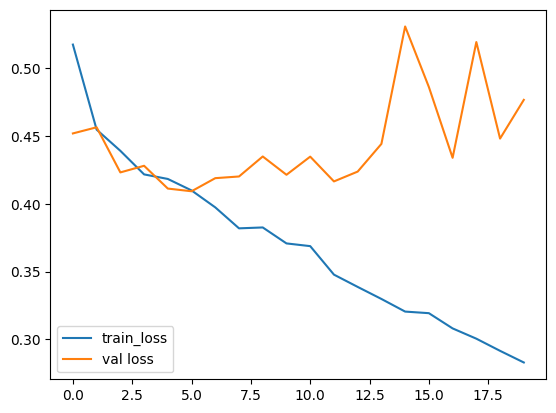

In [20]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


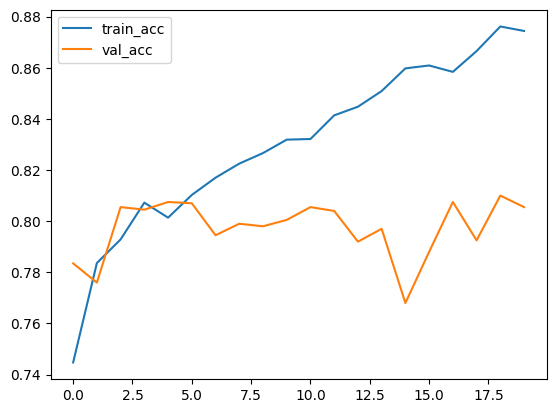

In [21]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [23]:
import numpy as np
from keras.utils import load_img, img_to_array

In [24]:
test_image = load_img('C:/Users/User/MachineLearning/TransferLearning/single_prediction/cat_or_dog_1.jpg', target_size=(64,64))

In [25]:
test_image2 = load_img('C:/Users/User/MachineLearning/TransferLearning/single_prediction/cat_or_dog_2.jpg', target_size=(64,64))

In [26]:
test_image = img_to_array(test_image)
test_image2 = img_to_array(test_image2)

In [27]:
test_image = np.expand_dims(test_image, axis=0)
test_image2 = np.expand_dims(test_image2, axis=0)

In [28]:
result = model.predict(test_image)

1/1 [==============================] - 0s 489ms/step


In [29]:
result2 = model.predict(test_image2)

1/1 [==============================] - 0s 75ms/step


In [30]:
result

array([[1.]], dtype=float32)

In [31]:
result2

array([[0.]], dtype=float32)

In [32]:
train_set.class_indices

{'cats': 0, 'dogs': 1}